In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv(r"scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [51]:
df.shape

(149, 3)

In [52]:
df.columns = df.columns.str.strip()

In [53]:
df["Score_out_of_7"] = df["Score"].str.split("/").str.get(0)

In [54]:
df["Score_out_of_7"] = df["Score_out_of_7"].astype("float")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Batch           149 non-null    object 
 1   User_ID         149 non-null    object 
 2   Score           149 non-null    object 
 3   Score_out_of_7  149 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


In [56]:
df.describe()

,Score_out_of_7
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [29]:
# Batch-wise descriptive statistics
batch_summary = df.groupby("Batch")["Score_out_of_7"].agg(
    Students="count",
    Average_Score="mean",
    Min_Score="min",
    Max_Score="max",
    Median_Score="median",
    Std_Deviation="std"
)

batch_summary.round(2)

,Students,Average_Score,Min_Score,Max_Score,Median_Score,Std_Deviation
Batch,,,,,,
AI_ELITE_4,48,3.79,0.0,7.0,4.0,1.44
AI_ELITE_6,48,4.23,0.0,7.0,4.0,1.64
AI_ELITE_7,53,5.06,2.0,7.0,5.0,1.45


<Axes: xlabel='Score_out_of_7', ylabel='count'>

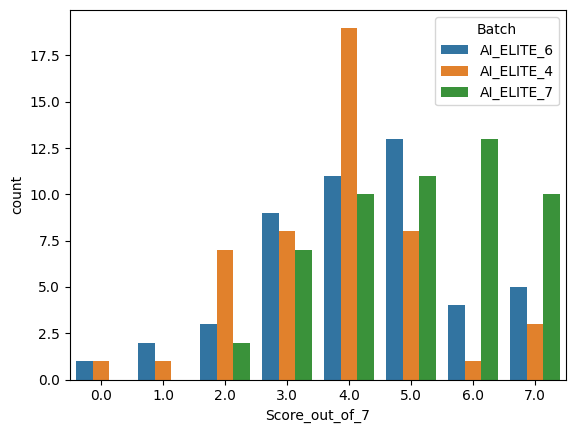

In [48]:
# Score distribution per batch
sns.countplot(data = df , hue = "Batch", x = "Score_out_of_7", stat="count")

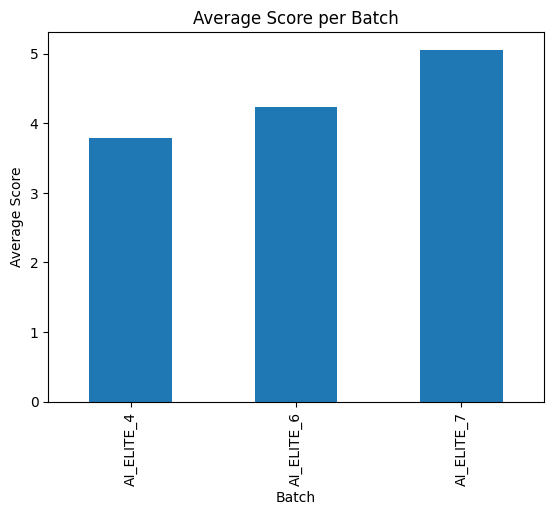

In [34]:
# Average score comparison
avg_scores = df.groupby("Batch")["Score_out_of_7"].mean()

plt.figure()
avg_scores.plot(kind="bar")
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.title("Average Score per Batch")
plt.show()

In [39]:
# Count of high performers (Score >= 6)
high_performers = df[df["Score_out_of_7"] >= 6].groupby("Batch")["User_ID"].count()
high_performers

Batch
AI_ELITE_4     4
AI_ELITE_6     9
AI_ELITE_7    23
Name: User_ID, dtype: int64

In [38]:
# Count of low performers (Score <= 2)
low_performers  = df[df["Score_out_of_7"] <= 2].groupby("Batch")["User_ID"].count()
low_performers 

Batch
AI_ELITE_4    9
AI_ELITE_6    6
AI_ELITE_7    2
Name: User_ID, dtype: int64

In [42]:
# for batch in df["Batch"].unique():
for batch in df["Batch"].unique():
    batch_data = df[df["Batch"] == batch]
    print(f"\nBatch: {batch}")
    print("Students:", batch_data.shape[0])
    print("Average Score:", round(batch_data["Score_out_of_7"].mean(), 2))
    print("High scorers (>=6):", batch_data[batch_data["Score_out_of_7"] >= 6].shape[0])
    print("Low scorers (<=2):", batch_data[batch_data["Score_out_of_7"] <= 2].shape[0])


Batch: AI_ELITE_7
Students: 53
Average Score: 5.06
High scorers (>=6): 23
Low scorers (<=2): 2

Batch: AI_ELITE_6
Students: 48
Average Score: 4.23
High scorers (>=6): 9
Low scorers (<=2): 6

Batch: AI_ELITE_4
Students: 48
Average Score: 3.79
High scorers (>=6): 4
Low scorers (<=2): 9


### Batch-wise insights
1. `AI_ELITE_4`
- `Students: 48`
- `Average score: 3.79`
- `Score range: 0 to 7`
- `Most scores are between 3 and 4`
- `Very few high scorers (6–7)`
- `Presence of 0 and 1 scores indicates learning gaps`
- `Insight: This batch struggles overall. Majority of students are clustered around below-average scores, suggesting a need for stronger foundational support or revision sessions.`

---

2. `AI_ELITE_6`
- `Students: 48`
- `Average score: 4.23`
- `Score range: 0 to 7`
- `Scores are well spread across 3 to 6`
- `More 5+ scorers compared to AI_ELITE_4`
- `Insight: This batch shows moderate and balanced performance. Many students are doing reasonably well, but there is still room to push average performers into the high-score range.`

---

3. `AI_ELITE_7`
- `Students: 53 (highest)`
- `Average score: 5.06 (highest)`
- `Score range: 2 to 7`
- `Large number of 6 and 7 scorers`
- `No extremely low scores (no 0 or 1)`
- `Insight: This is the best-performing batch. Students demonstrate strong understanding and consistency, with most scoring above average. Teaching approach and student engagement here appear highly effective.`

---

### Overall comparison :
- `AI_ELITE_7 performs the best overall`
- `AI_ELITE_6 is moderate and balanced`
- `AI_ELITE_4 has the weakest performance and highest low scores`